In [5]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_graph(df, target_column='WAF'):
    df = df.copy()

    if target_column not in df.columns:
        raise ValueError(f"'{target_column}' 컬럼이 DataFrame에 존재하지 않습니다.")

    workloads = sorted(df['workload'].unique())
    configs = sorted(df['config'].unique())

    # 파스텔 색상 목록 (필요시 확장 가능)
    colors = ['skyblue', 'lightpink', 'lightgreen', 'plum', 'gold']

    # subplot 개수 설정
    n = len(workloads)
    fig, axs = plt.subplots(1, n, figsize=(5 * n, 5), sharey=True)

    if n == 1:
        axs = [axs]

    for i, workload in enumerate(workloads):
        ax = axs[i]
        subset = df[df['workload'] == workload]
        means = subset.groupby('config')[target_column].mean().reindex(configs)

        bars = ax.bar(configs, means, color=[colors[j % len(colors)] for j in range(len(configs))])
        ax.set_title(f'Workload: {workload}')
        ax.set_xlabel('Config')
        ax.grid(True, axis='y', linestyle='--', alpha=0.6)

        # 막대 위에 수치 표시
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height + 0.02, f'{height:.2f}',
                    ha='center', va='bottom', fontsize=9)

        if i == 0:
            ax.set_ylabel(target_column)

    plt.tight_layout()
    plt.show()

In [6]:
def plot_graph2(df):
    df = df.copy()

    # write와 관련된 컬럼들
    write_columns = [
        'rocksdb.flush.write.bytes', 
        'rocksdb.compact.write.bytes', 
        'rocksdb.bytes.written'
    ]
    
    workloads = sorted(df['workload'].unique())
    configs = sorted(df['config'].unique())

    # 파스텔 색상 목록 (필요시 확장 가능)
    colors = ['skyblue', 'lightpink', 'lightgreen', 'plum', 'gold']

    # subplot 개수 설정
    n = len(workloads)
    fig, axs = plt.subplots(1, n, figsize=(5 * n, 5), sharey=True)

    if n == 1:
        axs = [axs]

    for i, workload in enumerate(workloads):
        ax = axs[i]
        subset = df[df['workload'] == workload]
        
        # 각 write 컬럼에 대해 평균값을 계산하여 그리기
        means = subset[write_columns].groupby(df['config']).mean().reindex(configs)

        # 각 write 컬럼에 대해 막대그래프 그리기
        width = 0.2  # 막대의 너비
        x = range(len(configs))  # X축 위치
        bar_width = width * len(write_columns)  # 막대의 너비를 설정
        
        for j, column in enumerate(write_columns):
            ax.bar(
                [pos + j * width - bar_width/2 for pos in x],  # 막대의 위치 설정
                means[column], 
                width=width, 
                label=column,
                color=colors[j % len(colors)]
            )
        
        ax.set_title(f'Workload: {workload}')
        ax.set_xlabel('Config')
        ax.set_xticks(x)  # X축에 config명 표시
        ax.set_xticklabels(configs)  # 각 config에 대한 레이블 설정
        ax.grid(True, axis='y', linestyle='--', alpha=0.6)
        ax.legend()

        if i == 0:
            ax.set_ylabel('Write Bytes')

    plt.tight_layout()
    plt.show()

In [7]:
import pandas as pd

df = pd.read_csv('modified_h1_output.csv')
df

,workload,compaction_style,config,rocksdb.number.keys.written,rocksdb.bytes.written,rocksdb.compact.write.bytes,rocksdb.flush.write.bytes,rocksdb.wal.bytes,rocksdb.write.wal,rocksdb.write.raw.input.bytes,WAF,latency,throughput_ops,throughput_bytes
0,fillrandom,fifo,perf_4096,500000,2064000000,0,1104517339,0,0,NaN,0.535134,10.955,91279.0,358.0
1,overwrite,universal,stable_4096,500000,2064000000,874169405,1104783902,2064000000,500000,NaN,0.958795,38.760,25697.0,100.8
2,overwrite,fifo,perf_4096,500000,2064000000,0,1104125169,0,0,NaN,0.534944,12.586,79450.0,311.6
3,overwrite,leveled,stable_4096,500000,2064000000,928642689,1104800027,2064000000,500000,NaN,0.985195,33.234,30046.0,117.8
4,fillrandom,universal,perf_4096,500000,2064000000,938107994,1104751825,0,0,NaN,0.989758,27.459,36406.0,142.8
5,overwrite,leveled,perf_4096,500000,2064000000,899581983,1104972461,0,0,NaN,0.971199,25.775,38797.0,152.1
6,overwrite,universal,perf_4096,500000,2064000000,937020799,1104694067,0,0,NaN,0.989203,29.564,33825.0,132.6
7,fillrandom,leveled,perf_4096,500000,2064000000,924594842,1104152116,0,0,NaN,0.982920,22.750,43937.0,172.3
8,fillrandom,fifo,stable_4096,500000,2064000000,0,1104514199,2064000000,500000,NaN,0.535133,18.277,54712.0,214.6
9,overwrite,fifo,stable_4096,500000,2064000000,0,1104760479,2064000000,500000,NaN,0.535252,19.996,50010.0,196.1


## Universal

In [8]:
universal = df[df['compaction_style'] == 'universal']
universal

,workload,compaction_style,config,rocksdb.number.keys.written,rocksdb.bytes.written,rocksdb.compact.write.bytes,rocksdb.flush.write.bytes,rocksdb.wal.bytes,rocksdb.write.wal,rocksdb.write.raw.input.bytes,WAF,latency,throughput_ops,throughput_bytes
1,overwrite,universal,stable_4096,500000,2064000000,874169405,1104783902,2064000000,500000,NaN,0.958795,38.760,25697.0,100.8
4,fillrandom,universal,perf_4096,500000,2064000000,938107994,1104751825,0,0,NaN,0.989758,27.459,36406.0,142.8
6,overwrite,universal,perf_4096,500000,2064000000,937020799,1104694067,0,0,NaN,0.989203,29.564,33825.0,132.6
11,fillrandom,universal,stable_4096,500000,2064000000,948039261,1105095275,2064000000,500000,NaN,0.994736,30.982,32249.0,126.5


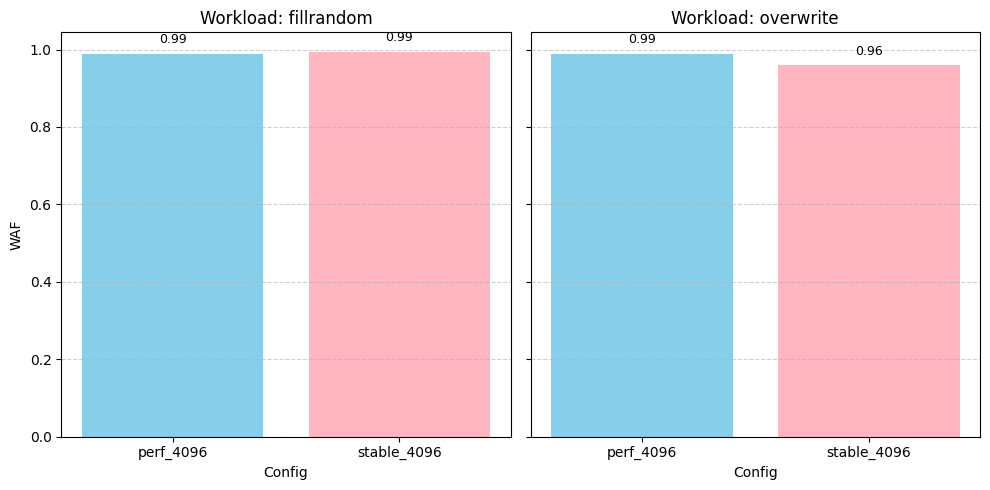

In [9]:
plot_graph(universal)

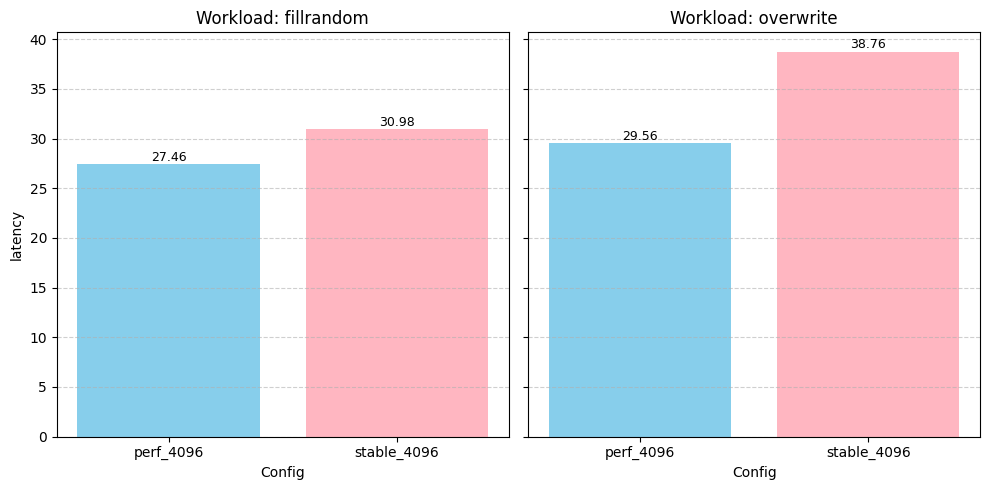

In [10]:
plot_graph(universal, target_column='latency')

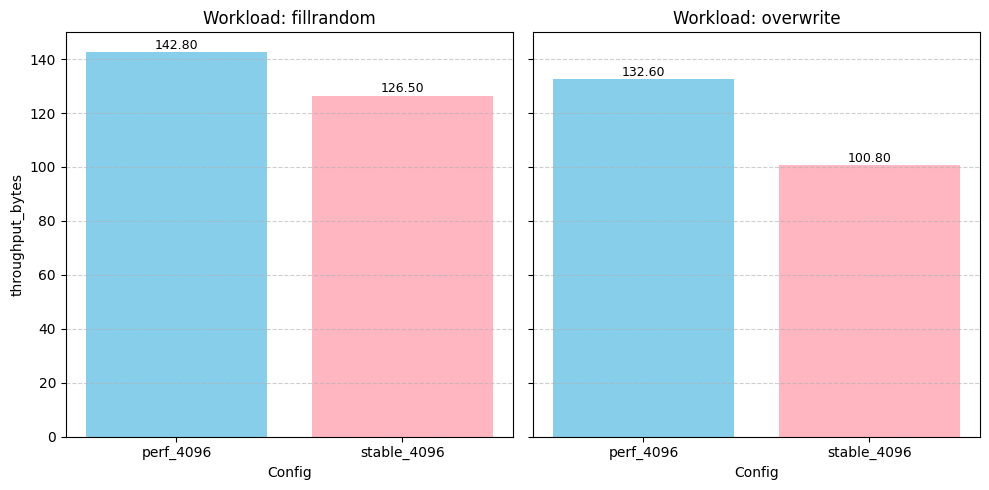

In [11]:
plot_graph(universal, target_column='throughput_bytes')

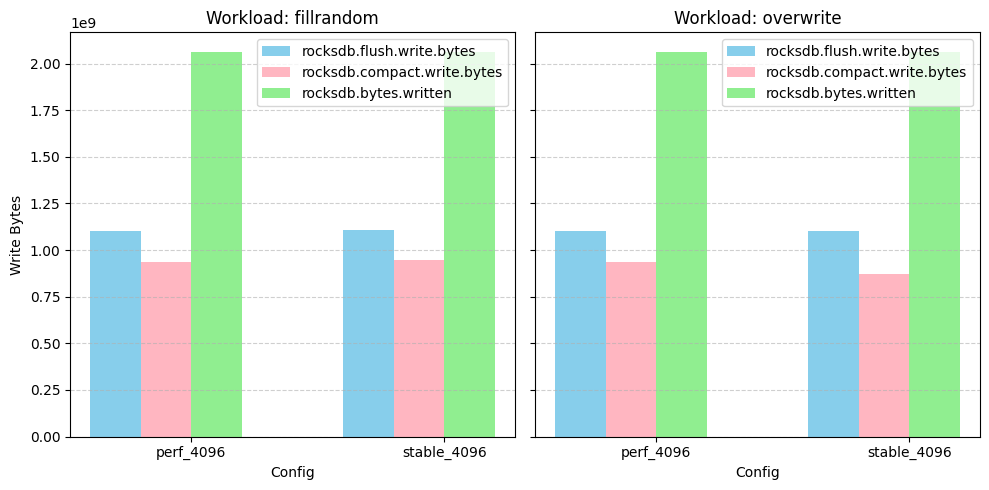

In [12]:
plot_graph2(universal)

## Leveled

In [13]:
leveled = df[df['compaction_style'] == 'leveled']
leveled

,workload,compaction_style,config,rocksdb.number.keys.written,rocksdb.bytes.written,rocksdb.compact.write.bytes,rocksdb.flush.write.bytes,rocksdb.wal.bytes,rocksdb.write.wal,rocksdb.write.raw.input.bytes,WAF,latency,throughput_ops,throughput_bytes
3,overwrite,leveled,stable_4096,500000,2064000000,928642689,1104800027,2064000000,500000,NaN,0.985195,33.234,30046.0,117.8
5,overwrite,leveled,perf_4096,500000,2064000000,899581983,1104972461,0,0,NaN,0.971199,25.775,38797.0,152.1
7,fillrandom,leveled,perf_4096,500000,2064000000,924594842,1104152116,0,0,NaN,0.982920,22.750,43937.0,172.3
10,fillrandom,leveled,stable_4096,500000,2064000000,909146688,1104605088,2064000000,500000,NaN,0.975655,32.670,30565.0,119.9


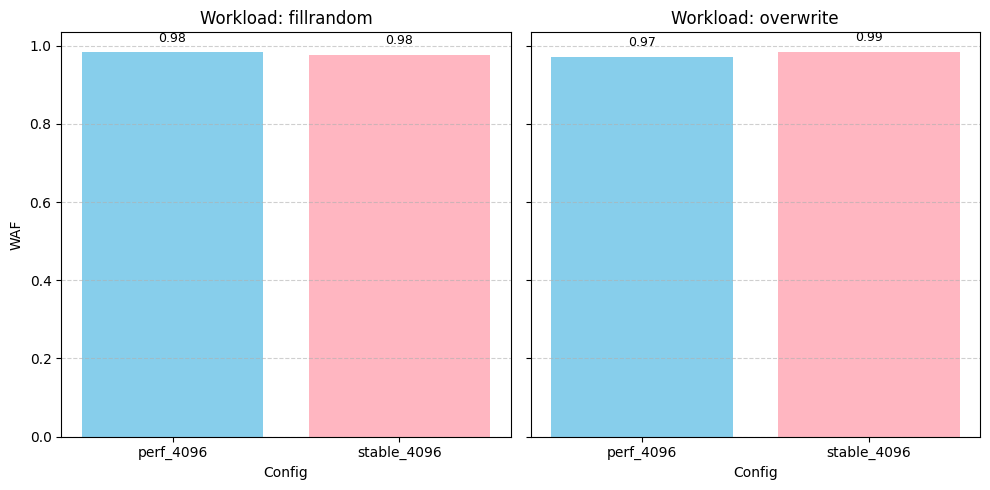

In [14]:
plot_graph(leveled)

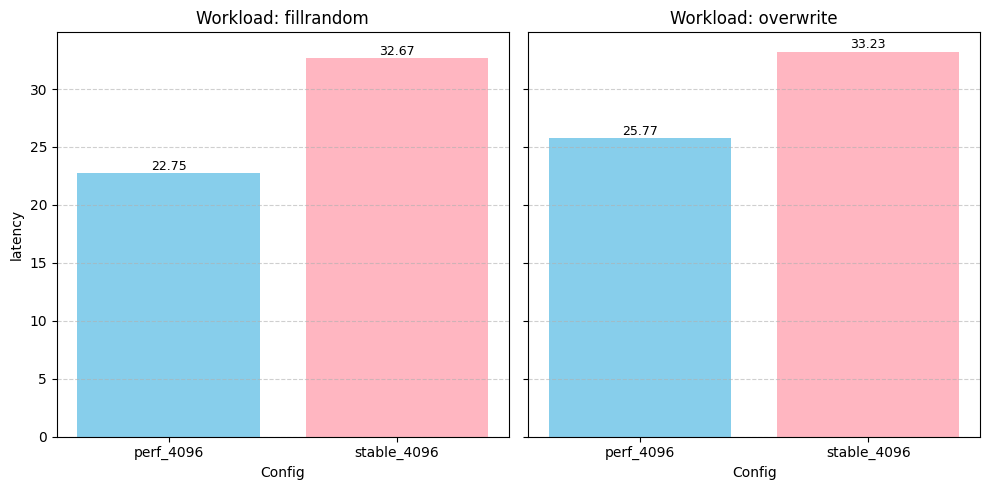

In [15]:
plot_graph(leveled, target_column='latency')

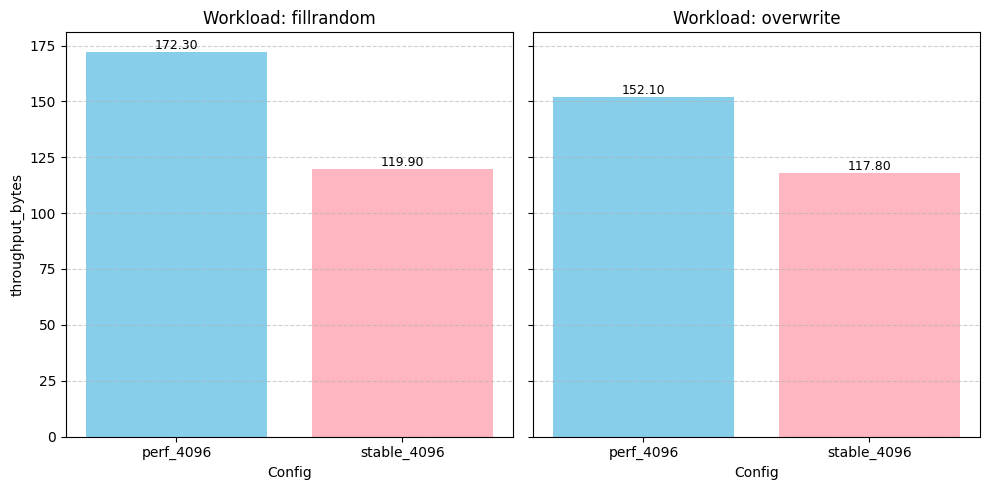

In [16]:
plot_graph(leveled, target_column='throughput_bytes')

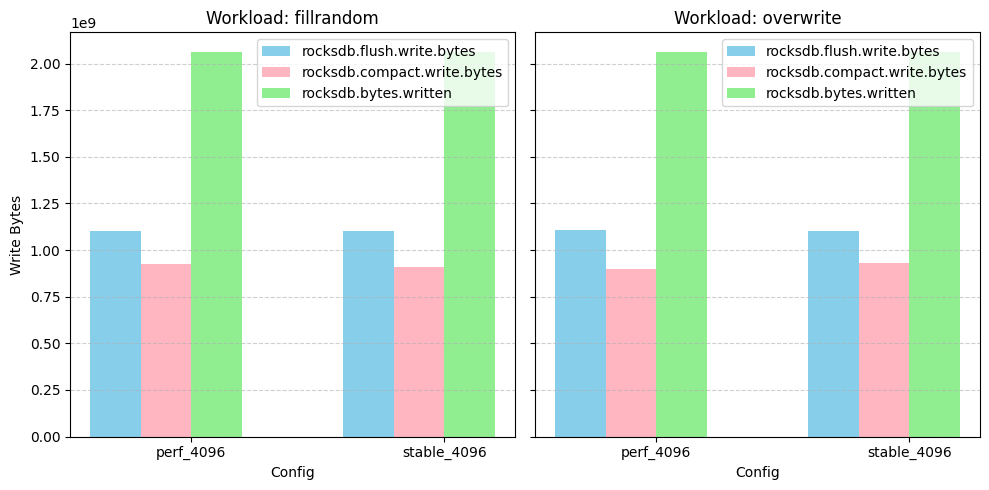

In [17]:
plot_graph2(leveled)

## FIFO

In [18]:
fifo = df[df['compaction_style'] == 'fifo']
fifo

,workload,compaction_style,config,rocksdb.number.keys.written,rocksdb.bytes.written,rocksdb.compact.write.bytes,rocksdb.flush.write.bytes,rocksdb.wal.bytes,rocksdb.write.wal,rocksdb.write.raw.input.bytes,WAF,latency,throughput_ops,throughput_bytes
0,fillrandom,fifo,perf_4096,500000,2064000000,0,1104517339,0,0,NaN,0.535134,10.955,91279.0,358.0
2,overwrite,fifo,perf_4096,500000,2064000000,0,1104125169,0,0,NaN,0.534944,12.586,79450.0,311.6
8,fillrandom,fifo,stable_4096,500000,2064000000,0,1104514199,2064000000,500000,NaN,0.535133,18.277,54712.0,214.6
9,overwrite,fifo,stable_4096,500000,2064000000,0,1104760479,2064000000,500000,NaN,0.535252,19.996,50010.0,196.1


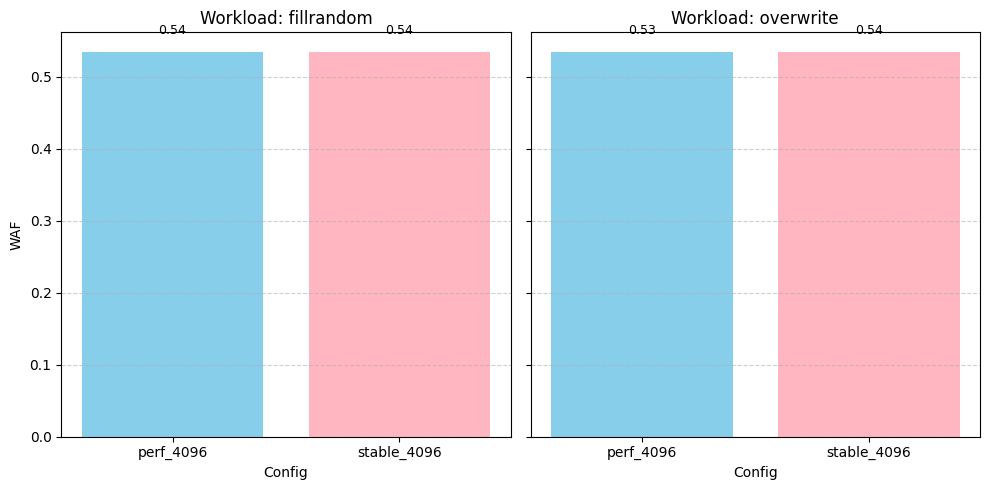

In [19]:
plot_graph(fifo)

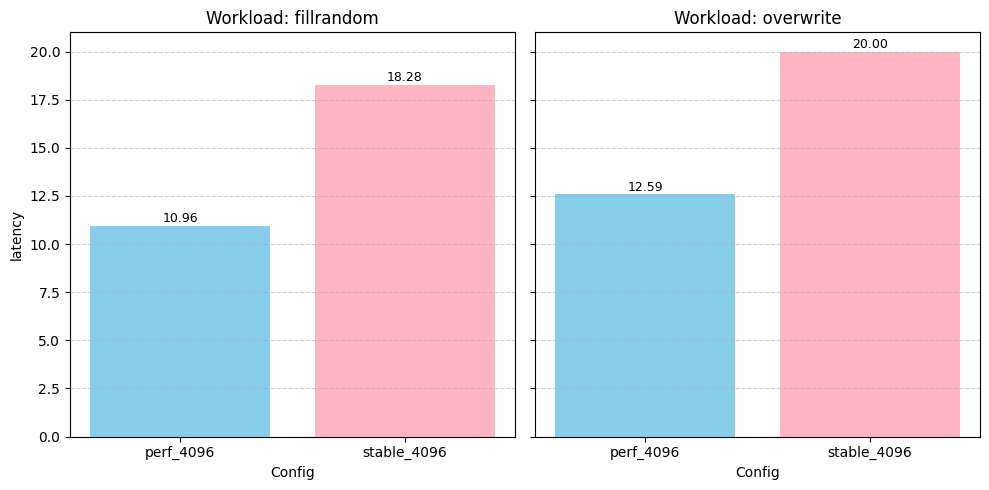

In [20]:
plot_graph(fifo, target_column='latency')

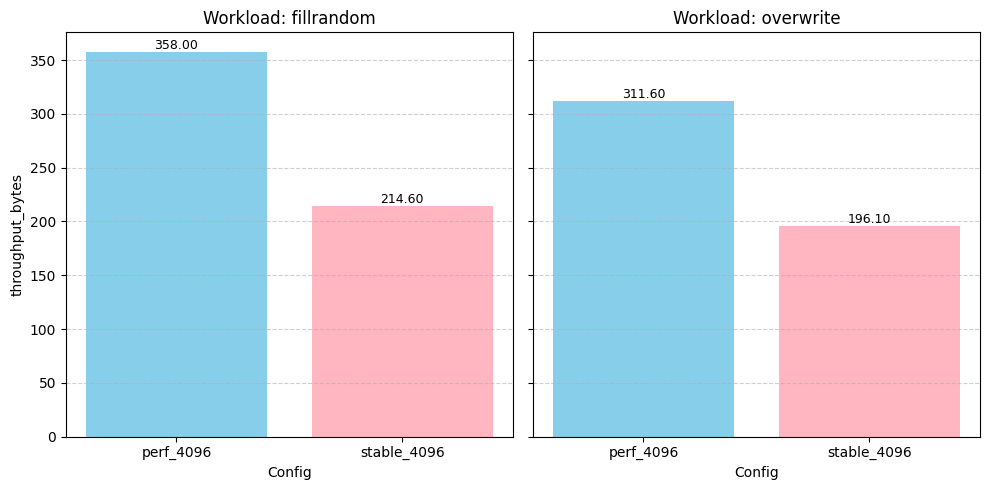

In [21]:
plot_graph(fifo, target_column='throughput_bytes')

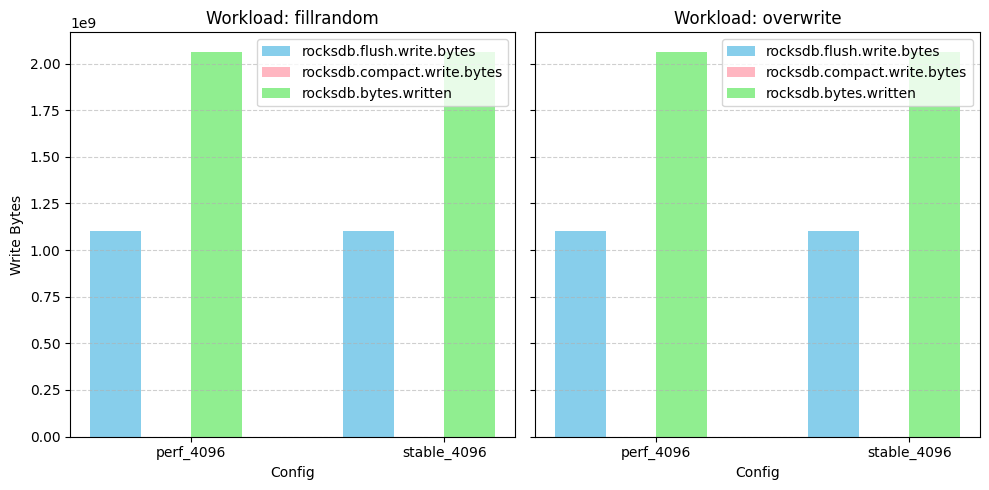

In [22]:
plot_graph2(fifo)